# Eigen Decomposition
$A = Q \Lambda Q^{-1}$  

Common example: if A is a dxd covariance matrix of d features,
the first few eigenvectors represent the most critical feature combinations.

The decomposition transforms features into a basis,
and ranks the dimensions by importance.

Matrix A must be diagnalizable i.e. square and invertible.
Note the formula requires the inverse, not the transpose.

Same as spectral decomposition if A is symmetric and contains real numbers not complex numbers.  

The eigenvalues are unique but the eigenvectors are not.
Multiples of eigenvectors work just as well since the formula multiplies them by their inverse.
The eigenvectors can be normalized to length=1.  

The eigenvalues (with their corresponding eigenvectors) can be rearranged from largest to smallest.
The eigenvectors from the smallest eigenvalues can be discarded for an approximation.  

The decomposition of A can be written  
$A = Q \Lambda Q^{-1}$  
where Q is a matrix of eigen column vectors,  
$Q^{-1}$ is the inverse,   
and big Lambda $\Lambda$ is a diagonal matrix of the little-lambda $\lambda$ eigenvalues.

Each eigenvalue corresponds to one eigenvector.
Larger eignvalues indicate more important vectors.

## Example 
From [wikipedia](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)

In [1]:
import numpy as np
def show(mat):
    print(mat)
    print(mat.ndim,'dimensions.',mat.shape,'shape.')

In [2]:
# 1 0
# 1 3
A = np.array([[1,0],[1,3]])
show(A)

[[1 0]
 [1 3]]
2 dimensions. (2, 2) shape.


Use numpy fpr eigen decompositon.

In [3]:
eigenvalues,eigenvectors=np.linalg.eig(A)
print('eigenvalues\n',eigenvalues)
print('eigenvectors\n',eigenvectors)

eigenvalues
 [3. 1.]
eigenvectors
 [[ 0.          0.89442719]
 [ 1.         -0.4472136 ]]


Reconstruct the orinal by hand.

In [4]:
Q =  np.array([[0,0.89442719],[1,-0.4472136]])
Lambda = np.array([[3,0],[0,1]])
intermediate = Q.dot(Lambda)
print('Q dot lambda\n',intermediate)
# compute the inverse of Q
# swap elements of forward diagonal
# invert elements on backward diagonal
Qi = np.zeros( (2,2) )
Qi[1,1]=Q[0,0]; Qi[0,0]=Q[1,1]
Qi[0,1]= 0-Q[0,1]; Qi[1,0]= 0-Q[1,0]
print('Q transformed\n',Qi)
determinant = Q[0,0]*Q[1,1]-Q[0,1]*Q[1,0]
Qi = Qi/determinant
print('and divided by determinant',determinant)
print('gives the inverse of Q\n',Qi)
reconstructed = intermediate.dot(Qi)
print('and the final reconstruction is\n',reconstructed)

Q dot lambda
 [[ 0.          0.89442719]
 [ 3.         -0.4472136 ]]
Q transformed
 [[-0.4472136  -0.89442719]
 [-1.          0.        ]]
and divided by determinant -0.89442719
gives the inverse of Q
 [[ 0.50000001  1.        ]
 [ 1.11803399 -0.        ]]
and the final reconstruction is
 [[1.         0.        ]
 [1.00000001 3.        ]]


Reconstruct the orinal using all numpy

In [5]:
diagonal = eigenvalues * np.identity(2)
R = eigenvectors.dot(diagonal.dot(np.linalg.inv(eigenvectors)))
print('reconstruction\n',R)

reconstruction
 [[1. 0.]
 [1. 3.]]


## Another example
From [UTDallas](https://personal.utdallas.edu/~herve/Abdi-EVD2007-pretty.pdf)

Eigenvalue 4 has eigenvector column( 3 2 ).
Eigenvalue -1 has eigenvector column ( -1 1 ).


In [6]:
A = np.array([[2,3],[2,1]])
print('original matrix\n',A)
eigenvalues,eigenvectors=np.linalg.eig(A)
print('eigenvalues\n',eigenvalues)
print('eigenvectors\n',eigenvectors)

original matrix
 [[2 3]
 [2 1]]
eigenvalues
 [ 4. -1.]
eigenvectors
 [[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [7]:
diagonal = eigenvalues * np.identity(2)
inverse = np.linalg.inv(eigenvectors)
reconstruction = eigenvectors.dot(diagonal).dot(inverse)
print('reconstruction\n',reconstruction)

reconstruction
 [[2. 3.]
 [2. 1.]]


Compared to UTDallas, numpy's eigenvalues are the same.  
Compared to UTDallas, numpy's eigenvectors are different.   
That's ok because eigenvectors are not unique.   
If we normalize the Dallas eigenvectors to unit length, we get the numpy values.  

In [8]:
ev1 = np.array([[3],[2]])  
ev2 = np.array([[-1],[1]])  
dallas_matrix = np.column_stack( (ev1,ev2) )
print('UTDallas gave these eigenvectors\n',dallas_matrix)

UTDallas gave these eigenvectors
 [[ 3 -1]
 [ 2  1]]


In [9]:
# Convert both eigenvectors to unit vectors 
len_ev1 = np.sqrt(3**2 + 2**2)
norm_ev1 = ev1/len_ev1
len_ev2 = np.sqrt(1**2 + 1**2)
norm_ev2 = ev2/len_ev2
norm_vectors = np.column_stack( (norm_ev1,norm_ev2) )
print('After length normalization, Dallas matches numpy\n',norm_vectors)

After length normalization, Dallas matches numpy
 [[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


## The math
For eigen decomposition of A,
use vector L for the unknown eigen values (L for lambda).   
Use identity matrix I to get a diagnonal matrix of eigen values, LI.   
Construct matrix A - LI by subtraction.   
Set the determinant to zero, as in |A - LI| = 0.   
Transform this into a polynomial equation and solve for L.

Find the eigenvectors using the eigenvalues using the formula:   
$A = Q \Lambda Q^{-1}$  

Here is a nice example of finding the eigenvalues for 
a 2x2 matrix. Taken from
[byjus](https://byjus.com/jee/how-to-determine-the-eigenvalues-of-a-matrix/#:~:text=How%20do%20you%20determine%20the,required%20eigenvalues%20of%20matrix%20A.)
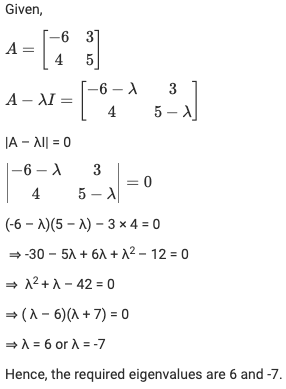